# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

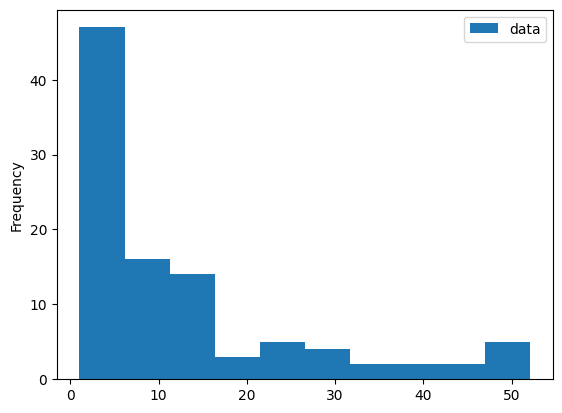

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

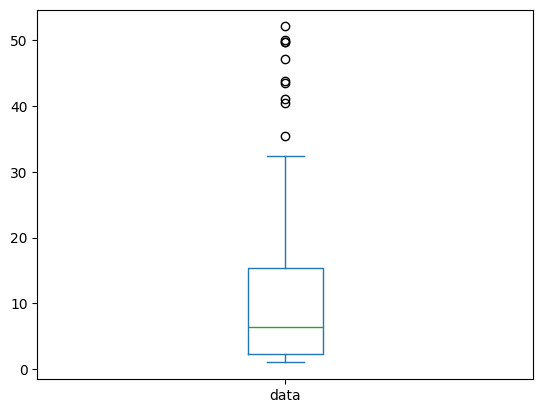

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [5]:
hypertension_DF = pd.read_csv('hypertension_dataset.csv') 


In [14]:
hypertension_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [15]:
numeric_df = hypertension_DF.select_dtypes(include='number')
numeric_df

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
0,58,29.5,230,160,79,27.9,9,14.7,6.1,80,100,75,72,179
1,34,36.2,201,120,84,27.5,6,10.8,9.8,56,77,47,90,113
2,73,18.2,173,156,60,1.8,5,6.5,5.2,75,162,56,81,101
3,60,20.3,183,122,94,11.6,6,4.0,7.5,71,164,93,94,199
4,73,21.8,296,91,97,29.1,6,8.4,5.0,52,108,74,226,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174977,51,39.4,266,174,82,10.3,6,13.9,9.5,96,172,72,100,95
174978,89,39.0,243,104,94,7.2,6,4.8,6.2,63,81,66,140,124
174979,43,36.5,266,109,98,22.9,8,9.7,10.0,62,139,39,93,71
174980,48,18.3,294,134,84,15.3,8,7.7,4.7,53,112,37,57,87


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Systolic_BP'}>],
       [<Axes: title={'center': 'Diastolic_BP'}>,
        <Axes: title={'center': 'Alcohol_Intake'}>,
        <Axes: title={'center': 'Stress_Level'}>,
        <Axes: title={'center': 'Salt_Intake'}>],
       [<Axes: title={'center': 'Sleep_Duration'}>,
        <Axes: title={'center': 'Heart_Rate'}>,
        <Axes: title={'center': 'LDL'}>, <Axes: title={'center': 'HDL'}>],
       [<Axes: title={'center': 'Triglycerides'}>,
        <Axes: title={'center': 'Glucose'}>, <Axes: >, <Axes: >]],
      dtype=object)

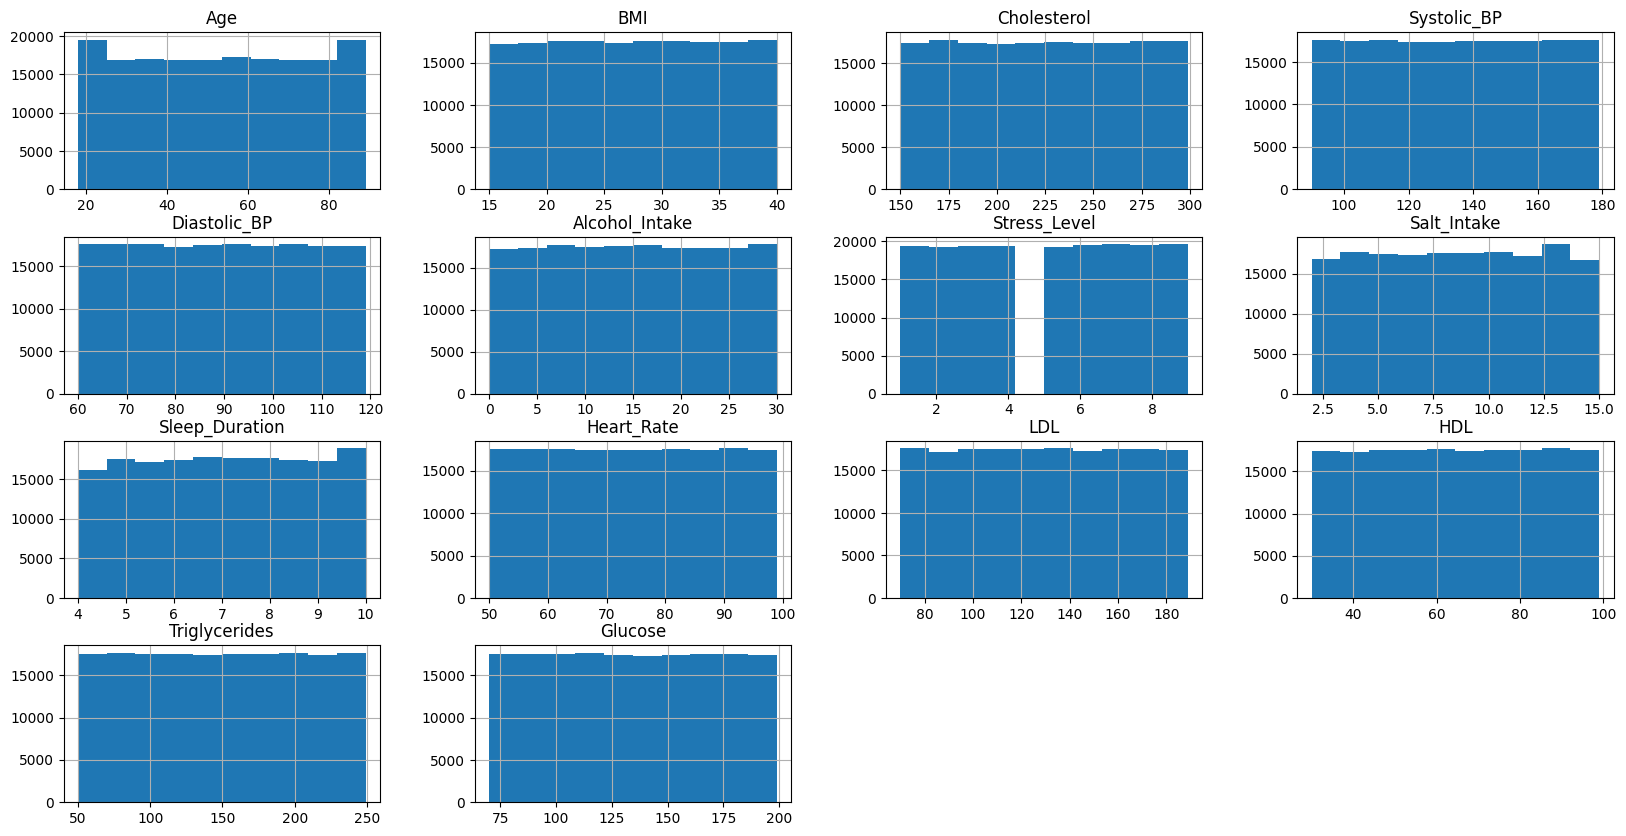

In [16]:
hypertension_DF.hist(figsize=(20,10),bins=10)



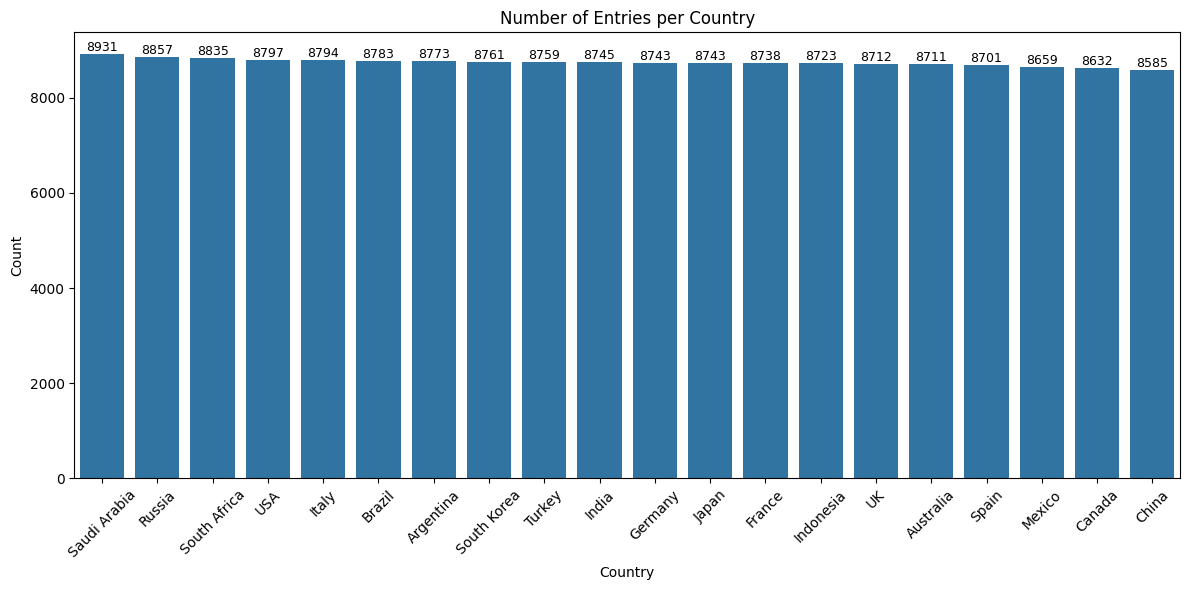

In [ ]:


# Prepare data
country_counts = hypertension_DF['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=country_counts, x='Country', y='Count')

# Add labels on top of bars
for index, row in country_counts.iterrows():
    barplot.text(index, row['Count'], row['Count'], color='black', ha="center", va="bottom", fontsize=9)

plt.title('Number of Entries per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Age distribution

In [36]:
print('min age', hypertension_DF['Age'].min())
print('max age', hypertension_DF['Age'].max())
print('median age', hypertension_DF['Age'].median())

min age 18
max age 89
median age 54.0


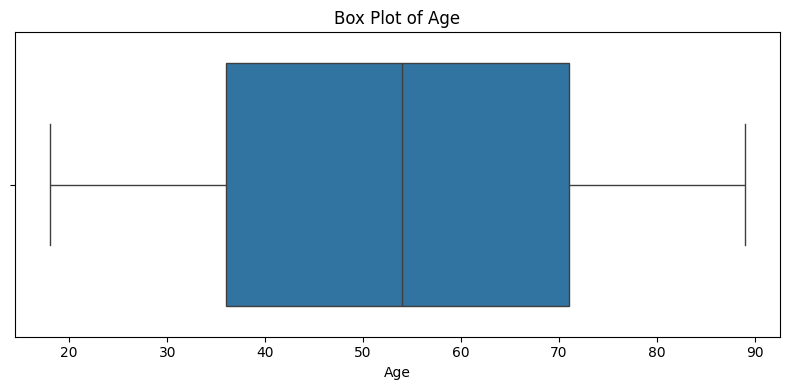

In [39]:

plt.figure(figsize=(8, 4))
sns.boxplot(x=hypertension_DF['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


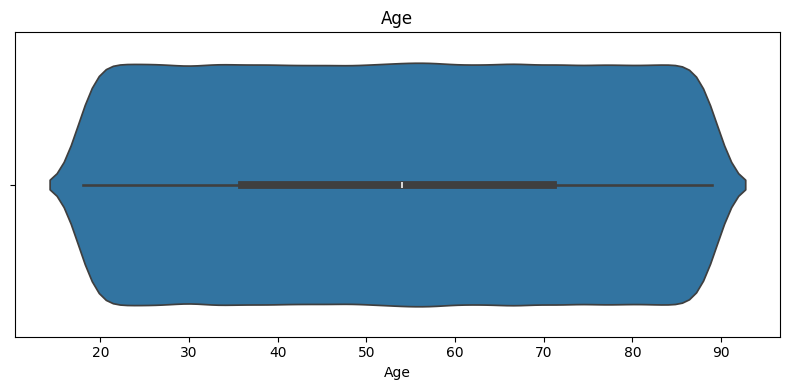

In [48]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=hypertension_DF['Age'])
plt.title('Age')
plt.xlabel('Age')
plt.tight_layout()
plt.show()


Age is roughly uniformly distributed.

# BMI Distribution

In [43]:
# BMI

print('min BMI', hypertension_DF['BMI'].min())
print('max BMI', hypertension_DF['BMI'].max())
print('median BMI', hypertension_DF['BMI'].median())

min BMI 15.0
max BMI 40.0
median BMI 27.5


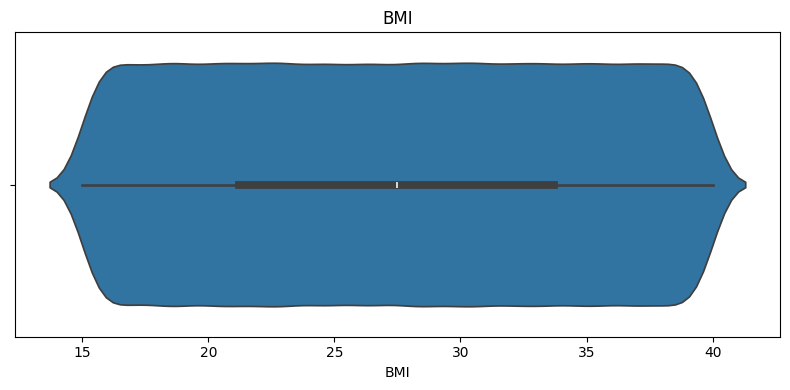

In [45]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=hypertension_DF['BMI'])
plt.title('BMI')
plt.xlabel('BMI')
plt.tight_layout()
plt.show()

BMI is roughly uniformly distributed

# Cholesterol Distribution

In [46]:
print('min Cholesterol', hypertension_DF['Cholesterol'].min())
print('max Cholesterol', hypertension_DF['Cholesterol'].max())
print('median Cholesterol', hypertension_DF['Cholesterol'].median())

min Cholesterol 150
max Cholesterol 299
median Cholesterol 225.0


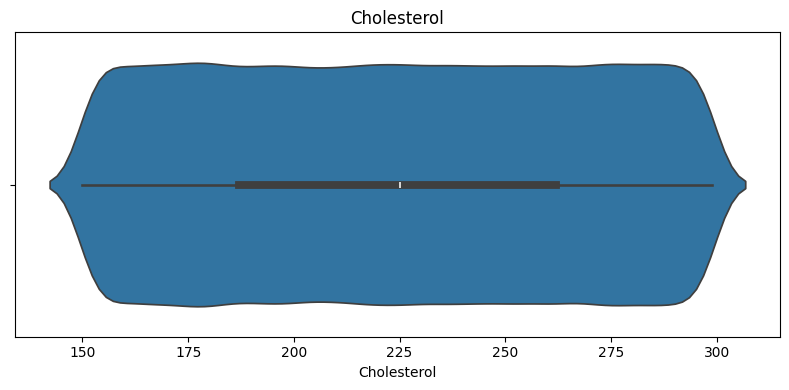

In [47]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=hypertension_DF['Cholesterol'])
plt.title('Cholesterol')
plt.xlabel('Cholesterol')
plt.tight_layout()
plt.show()

The Chelestrol distribution is roughly uniform

In [ ]:
print('min Chelestrol ', hypertension_DF['Chelestrol'].min())
print('max age', hypertension_DF['Age'].max())
print('median age', hypertension_DF['Age'].median())

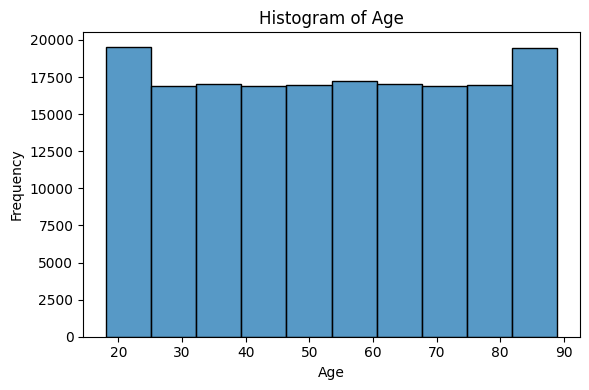

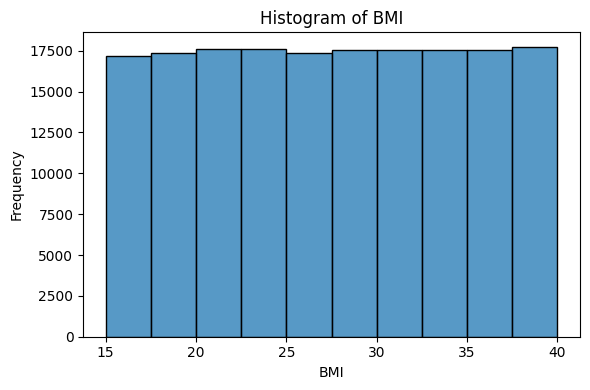

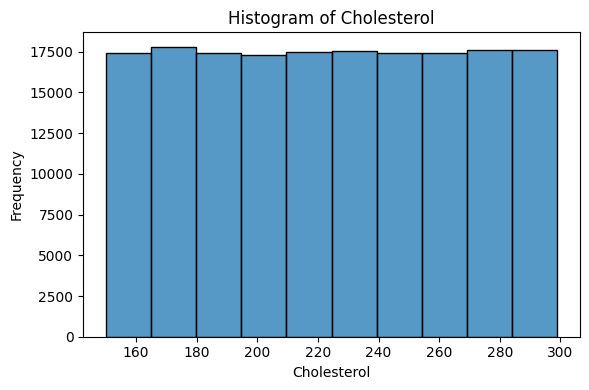

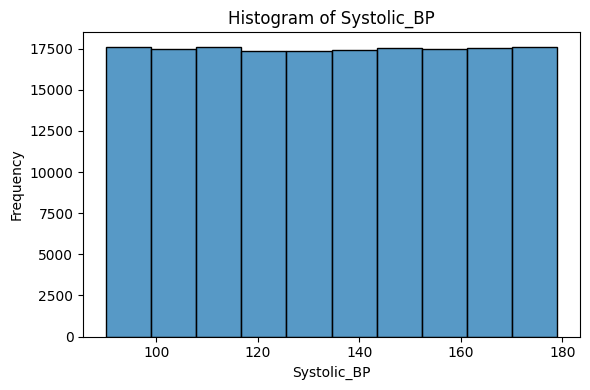

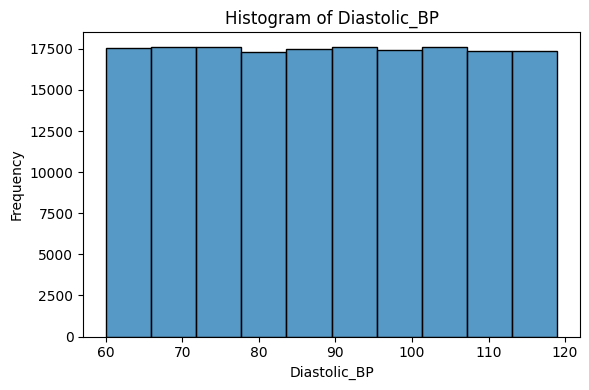

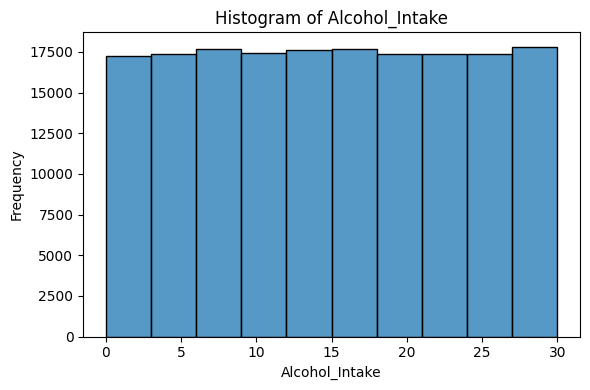

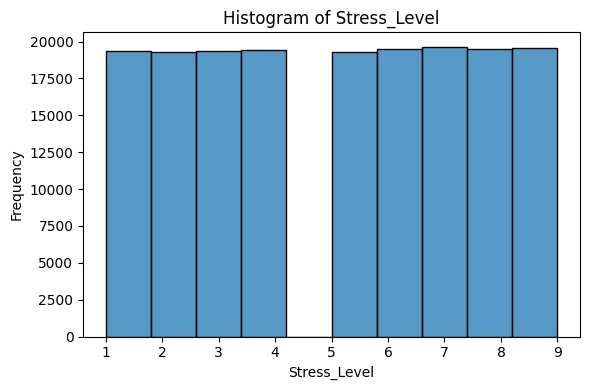

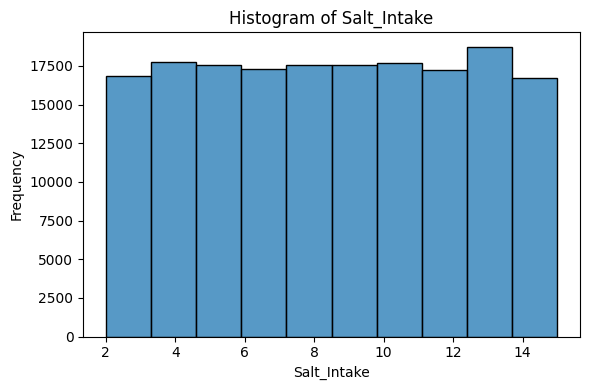

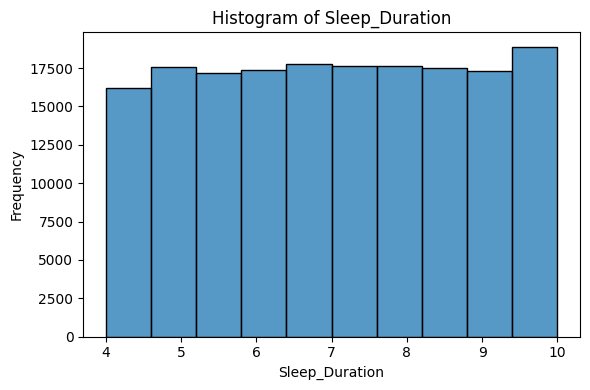

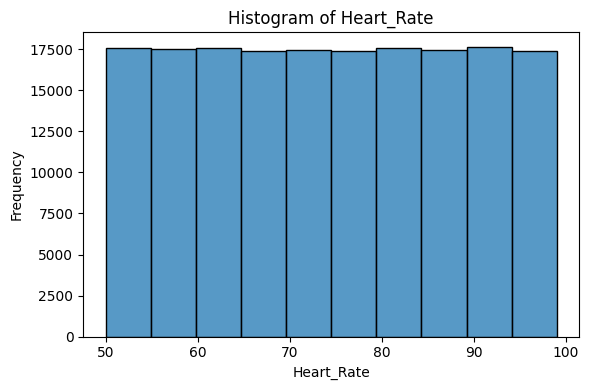

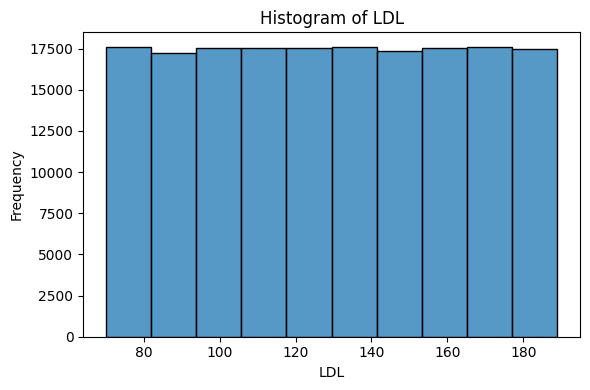

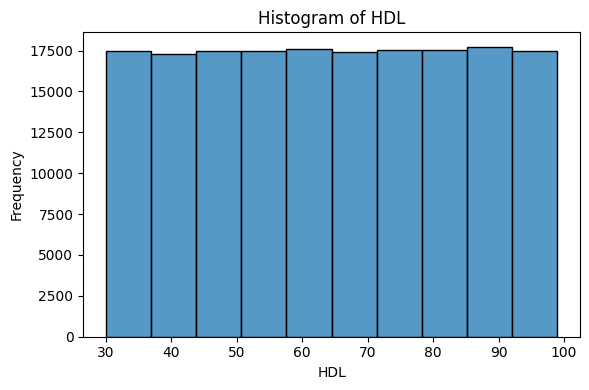

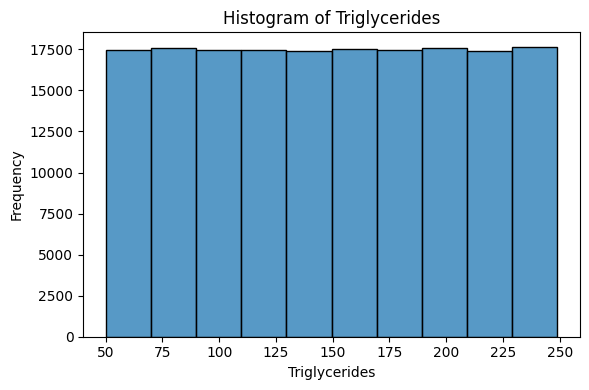

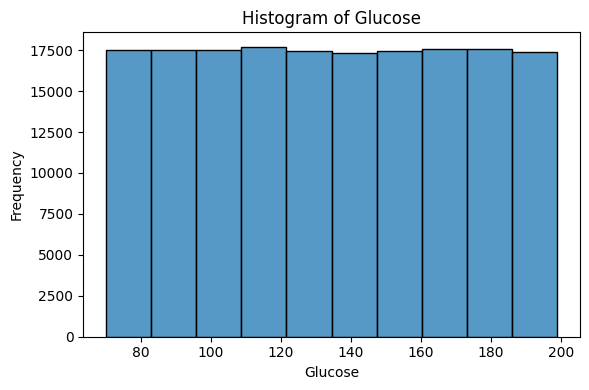

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numeric column and create a histogram
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_df, x=col, kde=False, bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


# Grouped Histograms

<Axes: xlabel='Age', ylabel='Count'>

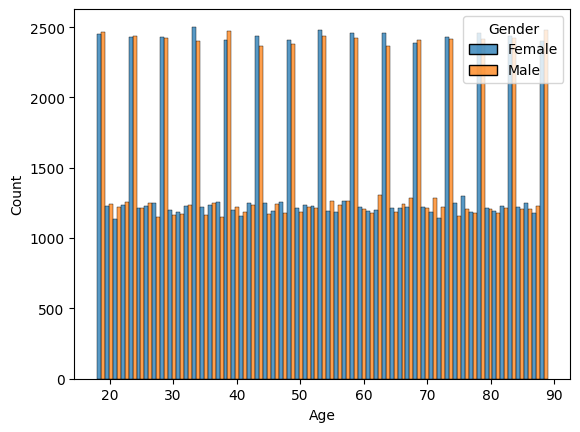

In [ ]:
sns.histplot(data=hypertension_DF, x='Age', hue='Gender', multiple='dodge')  


<Axes: xlabel='BMI', ylabel='Count'>

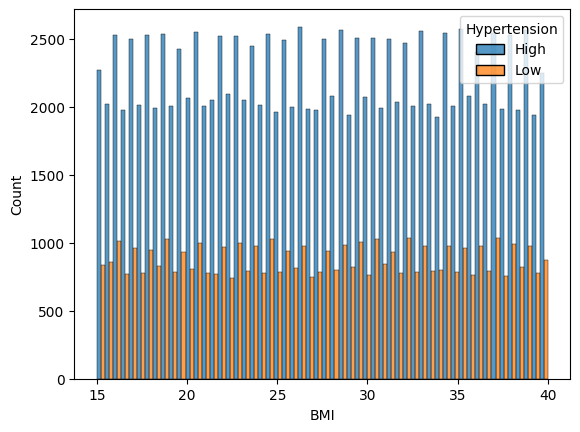

In [19]:
sns.histplot(data=hypertension_DF, x='BMI', hue='Hypertension', multiple='dodge')


<Axes: xlabel='Cholesterol', ylabel='Count'>

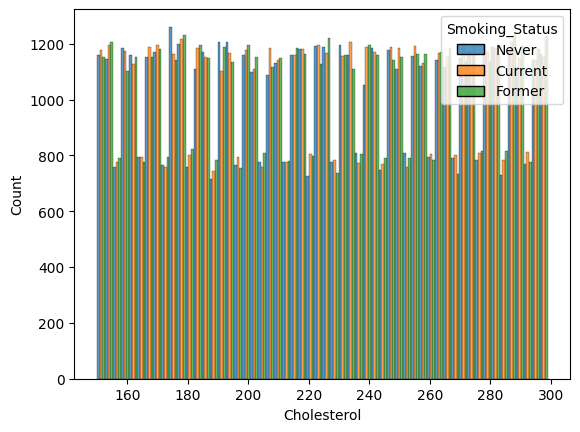

In [18]:
sns.histplot(data=hypertension_DF, x='Cholesterol', hue='Smoking_Status', multiple='dodge')


<Axes: xlabel='Sleep_Duration', ylabel='Count'>

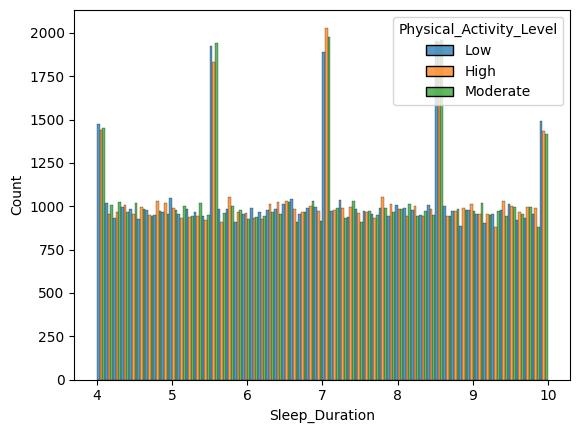

In [17]:
sns.histplot(data=hypertension_DF, x='Sleep_Duration', hue='Physical_Activity_Level', multiple='dodge')


<Axes: xlabel='Heart_Rate', ylabel='Count'>

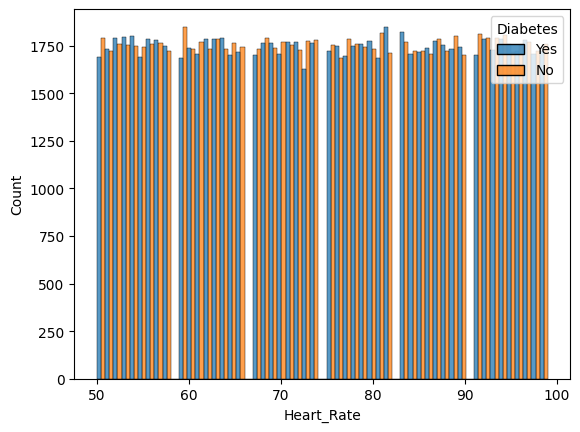

In [16]:
sns.histplot(data=hypertension_DF, x='Heart_Rate', hue='Diabetes', multiple='dodge')


# Barchart for categorical data

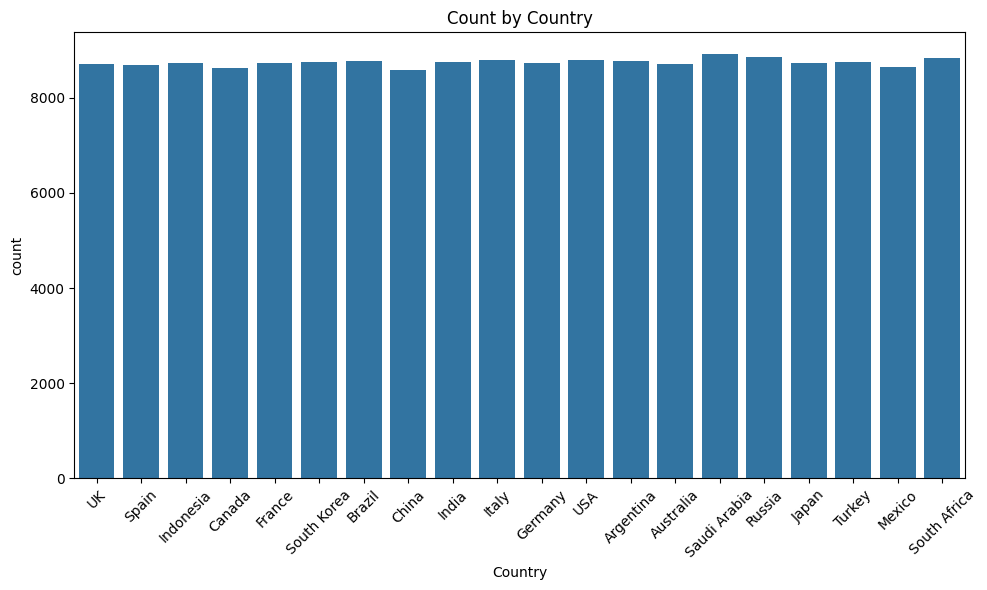

In [ ]:
# Country

plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=hypertension_DF)
plt.title('Count by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


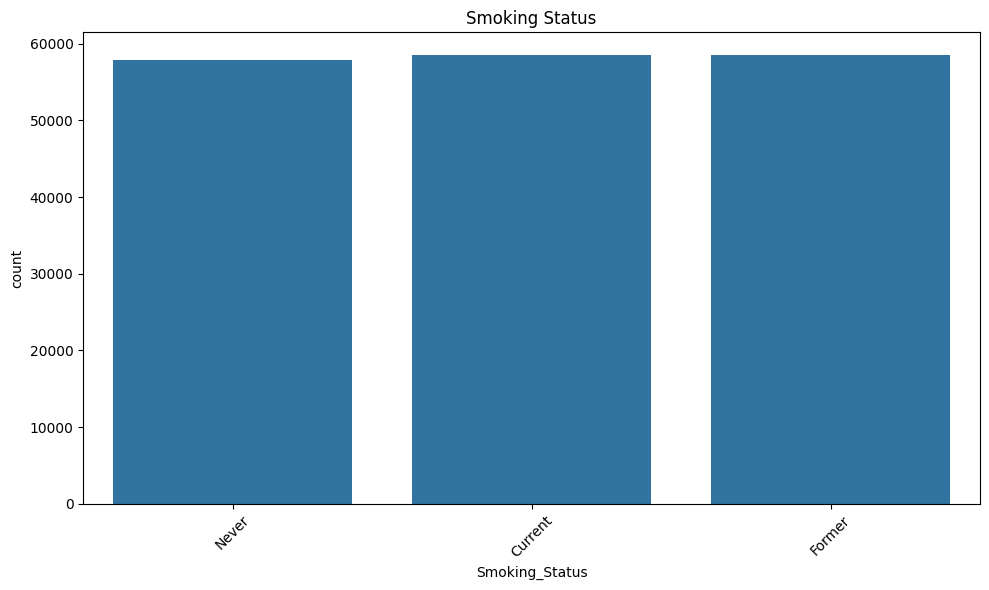

In [ ]:
# Smoking Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking_Status', data=hypertension_DF)
plt.title('Smoking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

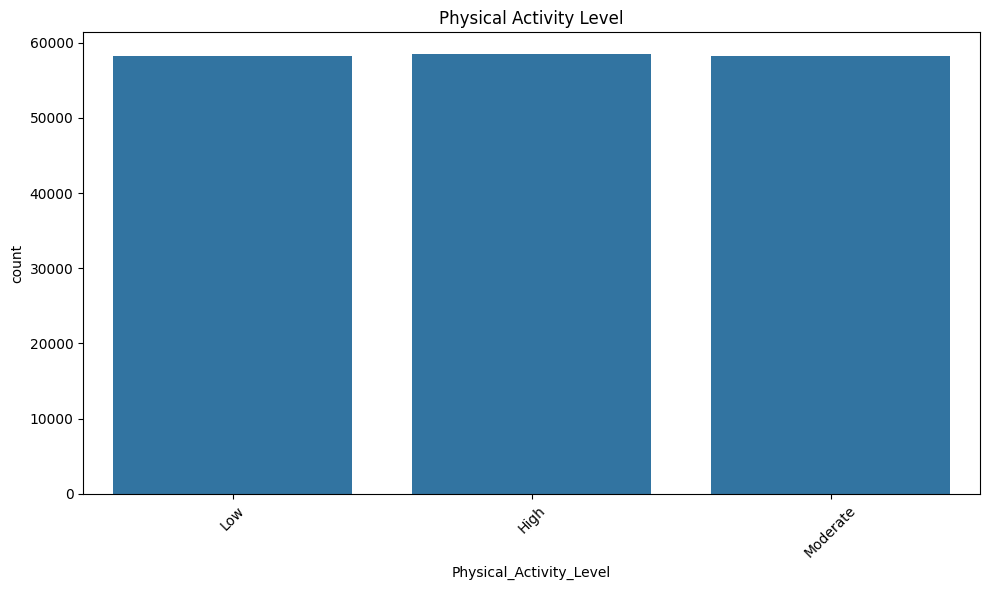

In [27]:
# Physical Activity

plt.figure(figsize=(10, 6))
sns.countplot(x='Physical_Activity_Level', data=hypertension_DF)
plt.title('Physical Activity Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

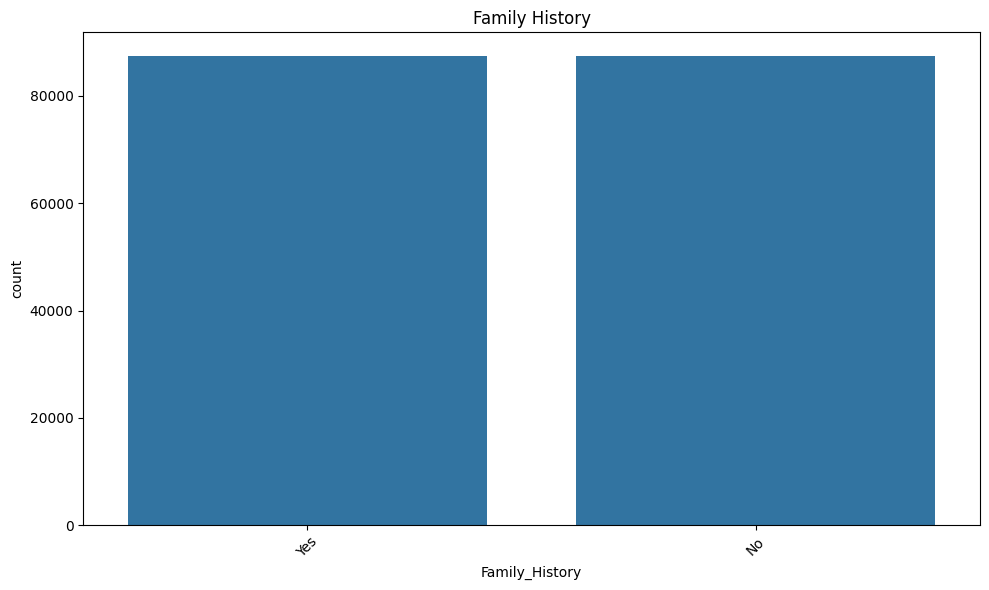

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_History', data=hypertension_DF)
plt.title('Family History')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

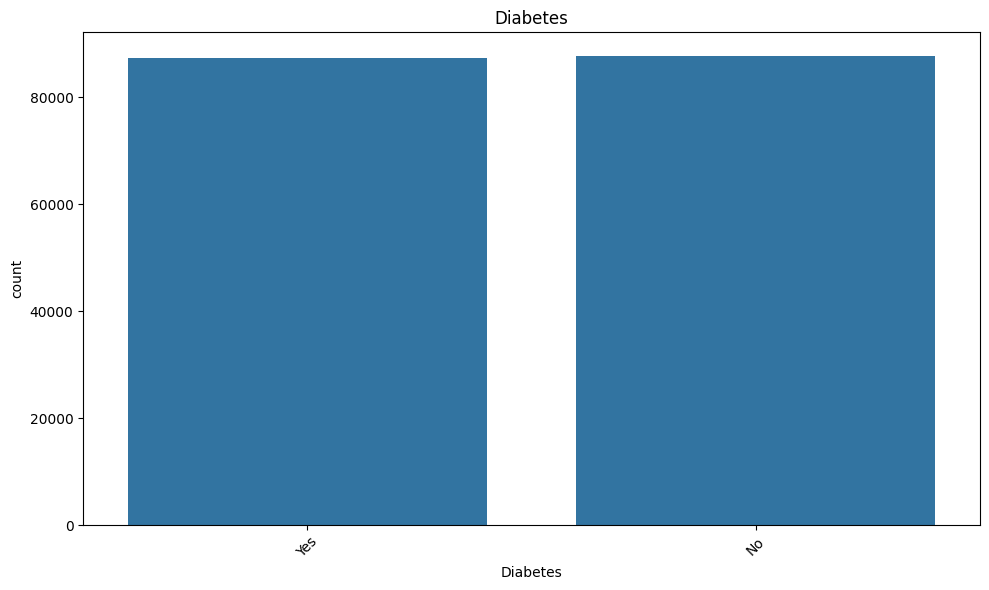

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes', data=hypertension_DF)
plt.title('Diabetes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

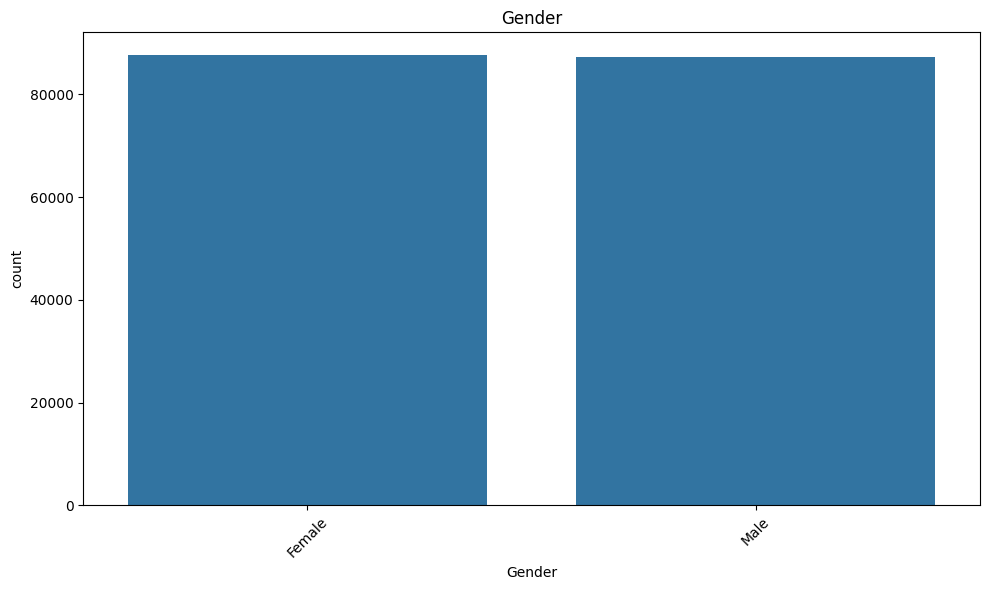

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=hypertension_DF)
plt.title('Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

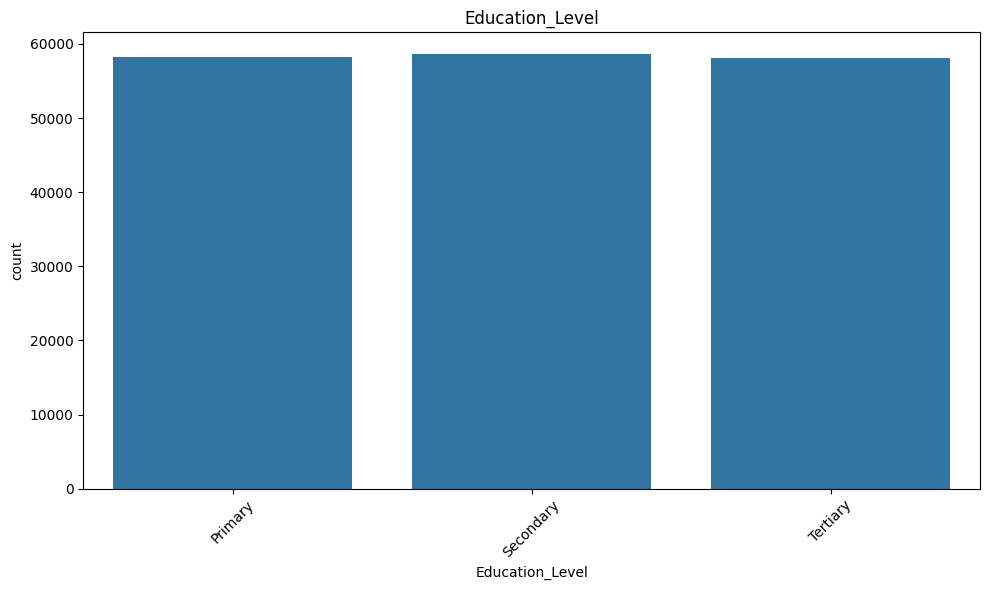

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', data=hypertension_DF)
plt.title('Education_Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

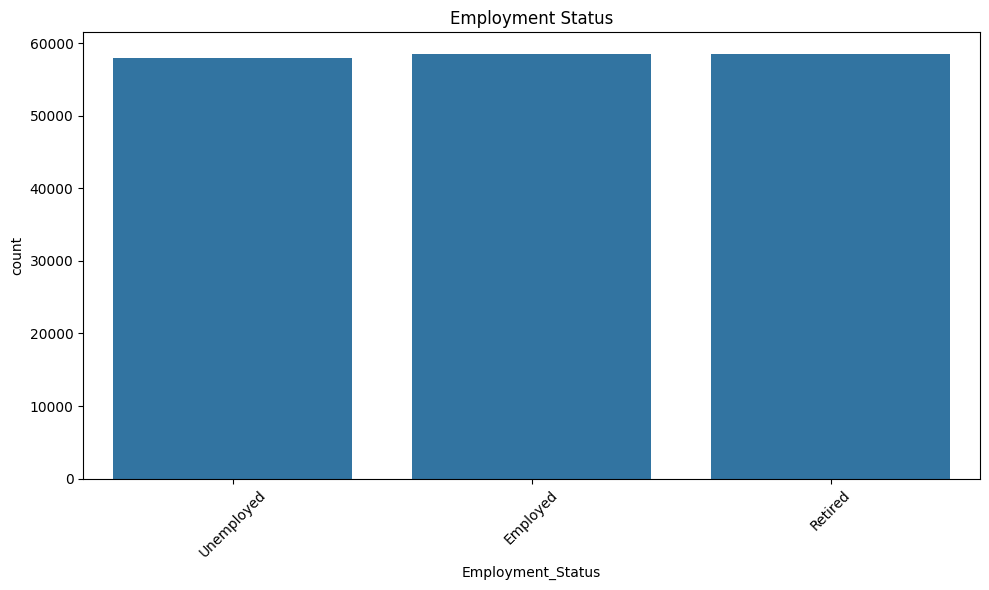

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment_Status', data=hypertension_DF)
plt.title('Employment Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

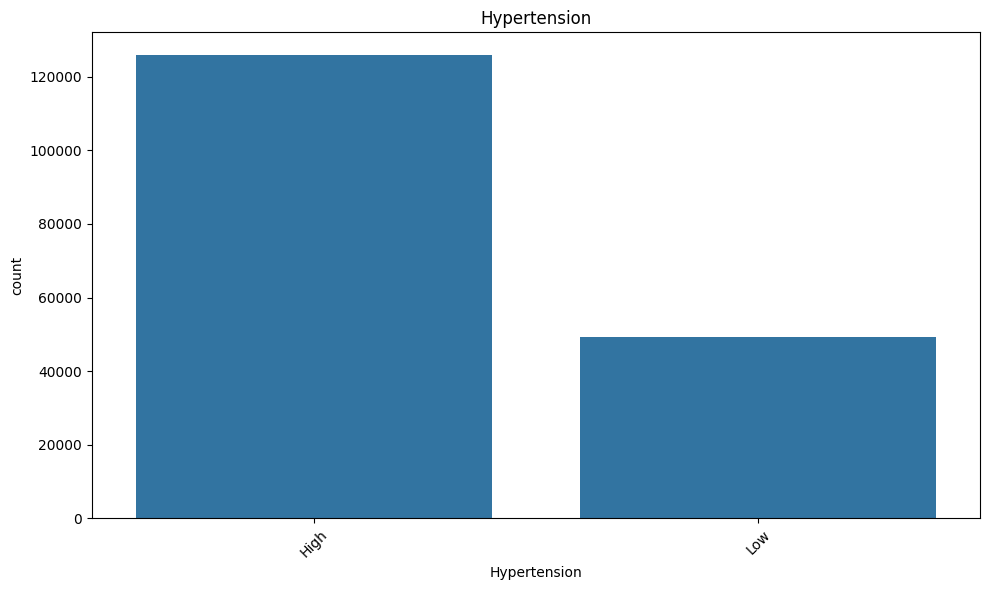

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hypertension', data=hypertension_DF)
plt.title('Hypertension')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mean Median And Mode


In [ ]:
# Means
means = hypertension_DF.mean(numeric_only=True)

# Medians
medians = hypertension_DF.median(numeric_only=True)

# Modes (note: mode() returns a DataFrame)
modes = hypertension_DF.mode(numeric_only=True).iloc[0]  

print("Means:\n", means)
print("Medians:\n", medians)
print("Modes:\n", modes)


Means:
 Age                53.493319
BMI                27.494672
Cholesterol       224.539335
Systolic_BP       134.505229
Diastolic_BP       89.450315
Alcohol_Intake     14.991069
Stress_Level        5.013041
Salt_Intake         8.482757
Sleep_Duration      6.996468
Heart_Rate         74.495085
LDL               129.528271
HDL                64.573105
Triglycerides     149.569836
Glucose           134.488187
dtype: float64
Medians:
 Age                54.0
BMI                27.5
Cholesterol       225.0
Systolic_BP       135.0
Diastolic_BP       89.0
Alcohol_Intake     15.0
Stress_Level        5.0
Salt_Intake         8.5
Sleep_Duration      7.0
Heart_Rate         74.0
LDL               130.0
HDL                65.0
Triglycerides     150.0
Glucose           134.0
dtype: float64
Modes:
 Age                73.0
BMI                22.5
Cholesterol       178.0
Systolic_BP       174.0
Diastolic_BP       85.0
Alcohol_Intake      6.7
Stress_Level        7.0
Salt_Intake         9.9
Sleep_Dura

In [36]:


# Calculate statistics
means = hypertension_DF.mean(numeric_only=True)
medians = hypertension_DF.median(numeric_only=True)
modes = hypertension_DF.mode(numeric_only=True).iloc[0]  # get first mode if multiple

# Combine into a single DataFrame
summary_stats = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

# Round for readability
summary_stats = summary_stats.round(2)

# Display the table
print(summary_stats.to_string())


                  Mean  Median   Mode
Age              53.49    54.0   73.0
BMI              27.49    27.5   22.5
Cholesterol     224.54   225.0  178.0
Systolic_BP     134.51   135.0  174.0
Diastolic_BP     89.45    89.0   85.0
Alcohol_Intake   14.99    15.0    6.7
Stress_Level      5.01     5.0    7.0
Salt_Intake       8.48     8.5    9.9
Sleep_Duration    7.00     7.0    6.5
Heart_Rate       74.50    74.0   83.0
LDL             129.53   130.0   79.0
HDL              64.57    65.0   86.0
Triglycerides   149.57   150.0   52.0
Glucose         134.49   134.0  177.0


In [37]:
# Calculate min and max for numeric columns
min_values = hypertension_DF.min(numeric_only=True)
max_values = hypertension_DF.max(numeric_only=True)

# Combine into a DataFrame
min_max_summary = pd.DataFrame({
    'Minimum': min_values,
    'Maximum': max_values
})

# Display the table
print(min_max_summary.to_string())


                Minimum  Maximum
Age                18.0     89.0
BMI                15.0     40.0
Cholesterol       150.0    299.0
Systolic_BP        90.0    179.0
Diastolic_BP       60.0    119.0
Alcohol_Intake      0.0     30.0
Stress_Level        1.0      9.0
Salt_Intake         2.0     15.0
Sleep_Duration      4.0     10.0
Heart_Rate         50.0     99.0
LDL                70.0    189.0
HDL                30.0     99.0
Triglycerides      50.0    249.0
Glucose            70.0    199.0


# Conclusions



#### Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
##### Being that all the variables are failry uniform and each class has fairly the same porportion of values shows that the dataset is likely a syhthetic dataset. This can be used 

#### What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.? The overall shape of the distribution is uniform, most of the data values have equal probability.

- Are there any outliers present?  (Data points that are far from the others.) There are no outliers present in the dataset. 

- If there are multiple related histograms, how does the distribution change across different groups? The distribution does not change

- What are the minimum and maximum values represented in each histogram? The min and max values shown above.

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data? The bin sizes typically affects the distributions in datasets but this dataset is fairly uniform so changing the bin sizes does not affect it. 

- Does the distribution appear normal, or does it have a different distribution? The dataset has a uniform distribution

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.